# Sharks Attack Dataset Cleaning 🦈🧹

In this notebook, we will be cleaning the `shark_attacks.csv` dataset, leaving a suitable dataset for exploratory data analysis.
However, we have been restricted for this specific task, our lead teacher has proposed the following restrictions:

- There must be the same number of columns as there are in the raw CSV, so in our final cleaned version we need to have a total of `23` columns.
- There must remain at least `2500` rows after our cleaning.
- So our `df.shape = (2500, 23)`

In [1]:
%pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the neccesary libraries for our cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/Users/borch/anaconda3/envs/clase/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Step 1: Load the CSV into a Dataframe 📥

In [3]:
# Let's first address some issues, let's display ALL columns
pd.set_option('display.max_columns', 50)

In [4]:
sharks_raw = pd.read_csv('../data/shark_attacks.csv', encoding="latin-1")
pd.set_option('display.max_rows', 50)

In [5]:
# Let's save the shape of our original dataframe to make sure we comply with restrictions
original_shape = sharks_raw.shape
original_shape

(25723, 24)

In [6]:
# We now will work with our copy of the original dataframe and start cleaning
sharks = sharks_raw.copy()

## Step 2: Explore the Data


In [7]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [8]:
sharks.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [9]:
sharks.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

### Let's normalize the columns, as there is a lot of spaces, uppercases, and overall mess

In [10]:
# list of original col names
raw_cols = list(sharks.columns)
new_cols = []

for c in raw_cols:
    splitted = c.split()
    res = '_'.join(splitted).lower()
    new_cols.append(res)
    
new_cols

['case_number',
 'date',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex',
 'age',
 'injury',
 'fatal_(y/n)',
 'time',
 'species',
 'investigator_or_source',
 'pdf',
 'href_formula',
 'href',
 'case_number.1',
 'case_number.2',
 'original_order',
 'unnamed:_22',
 'unnamed:_23']

In [11]:
new_cols[-5] = new_cols[-5].replace('.', '_')
new_cols[-4] = new_cols[-4].replace('.', '_')
new_cols[12] = 'fatal'
new_cols[-2] = 'unnamed_1'
new_cols[-1] = 'unnamed_2'

new_cols

['case_number',
 'date',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex',
 'age',
 'injury',
 'fatal',
 'time',
 'species',
 'investigator_or_source',
 'pdf',
 'href_formula',
 'href',
 'case_number_1',
 'case_number_2',
 'original_order',
 'unnamed_1',
 'unnamed_2']

In [12]:
sharks.columns = new_cols
sharks

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_1,unnamed_2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3: Check for duplicated rows 👥
As a first step in actually cleaning, we will check for duplicated rows, as 2x rows exactly the same won't be useful for our analysis

In [13]:
sharks.duplicated().value_counts()

True     19411
False     6312
Name: count, dtype: int64

In [14]:
# We have over 19,000 duplicated rows, let's drop them
sharks.drop_duplicates(inplace=True)
sharks.duplicated().value_counts()

False    6312
Name: count, dtype: int64

## Step 4: Null cleaning 
#### Now that we have no duplicated rows, we will check how many null values we have in our dataframe
#### I believe visualizing the nulls with a heatmap can be very useful to understand the big picture of nulls present in any dataframe

In [15]:
# My function to plot nulls

def plot_null_heatmap(df):
    # Create a heatmap of null values in the DataFrame
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Null Values Heatmap")
    plt.show()

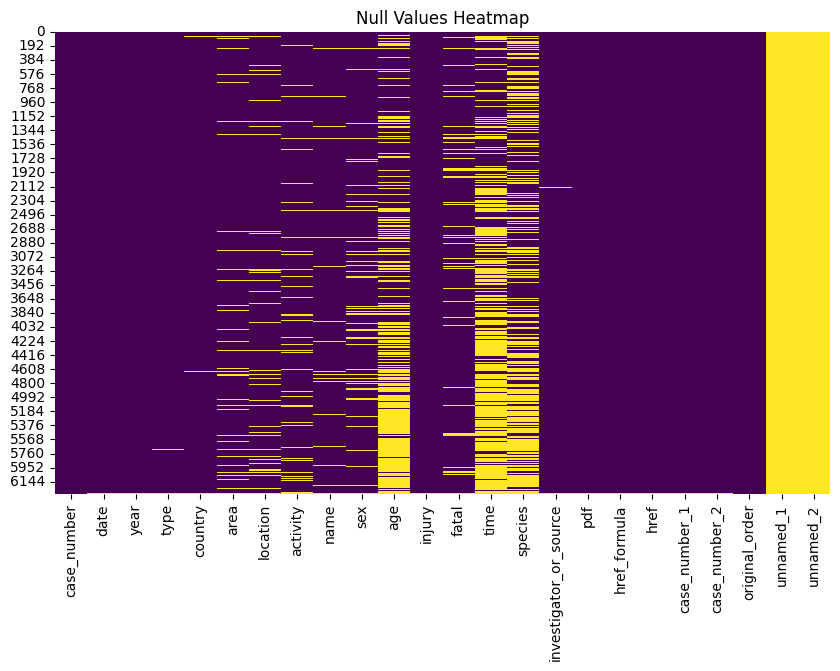

In [16]:
plot_null_heatmap(sharks)

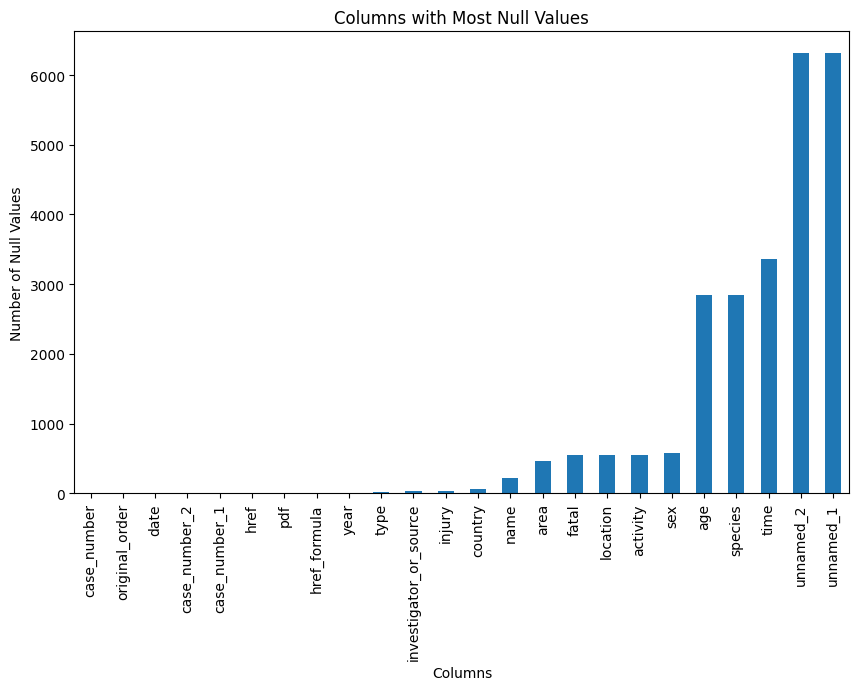

In [17]:
# Calculate the number of null values in each column
null_counts = sharks.isnull().sum()

# Sort the columns by the number of null values (ascending)
null_counts = null_counts.sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Columns with Most Null Values')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()


#### 2 columns instantly stand out, let's move on!

In [18]:
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6310 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal                   5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null   obje

#### Let's find out the columns with null values!

In [19]:
# columnas con valores nulos

nan_cols = sharks.isna().sum()

nan_cols[nan_cols>0]

nan_cols.sort_values(ascending=False)

unnamed_1                 6311
unnamed_2                 6310
time                      3364
species                   2848
age                       2841
sex                        575
activity                   554
location                   550
fatal                      549
area                       465
name                       220
country                     60
injury                      38
investigator_or_source      27
type                        14
year                        12
href_formula                11
date                        10
pdf                         10
href                        10
case_number_1               10
case_number_2               10
original_order               3
case_number                  2
dtype: int64

#### There is a huge amount of nulls in the `unnamed_22` and `unname_23`
- Let's first address these 2 columns, we know we have `6312` rows after removing duplicated rows, so they are practically empty.
- According to the restrictions, we need to have 23 cols at the end of our analysis, so lets drop both and later fix it!

In [20]:
sharks.drop(columns=['unnamed_1', 'unnamed_2'], axis=1, inplace=True)

In [21]:
sharks.isna().sum().sort_values(ascending=False).head(10)

time        3364
species     2848
age         2841
sex          575
activity     554
location     550
fatal        549
area         465
name         220
country       60
dtype: int64

The next column with a significant amount of `null` values is Time with `3364`

In [22]:
sharks[sharks["time"].notnull()].time.value_counts()

time
Afternoon      187
11h00          128
Morning        121
12h00          109
15h00          108
              ... 
14h37            1
10h07            1
13h53            1
13h23            1
19h00-20h00      1
Name: count, Length: 366, dtype: int64

As it name implies, simply the time at which the attack took place, let`s find the proportion of nulls of the column

In [23]:
sharks.shape

(6312, 22)

In [24]:
sharks.time.isna().value_counts(normalize=True)

time
True     0.532953
False    0.467047
Name: proportion, dtype: float64

#### `46.7%` of the `Time` column are null values, and we can no longer remove columns, so let's address it this way:
- We can remove rows. We have a total of `6312` rows, and we are limited to a minimum of  `2,500`
- Let's remove the NaN first, and then try to standarize the `Time` column with more uniform values

In [25]:
sharks['time'].fillna('unknown', inplace=True)
shape = sharks.shape

#### As for the rest of the values in this columns, let's try to standarize it into three categories: `morning`, `afternoon`, `evening` and `night`

In [26]:
def standardize_time(df):
    # Define a regular expression pattern to match time values like "10h30"
    time_pattern = r'(\d{1,2})[h:](\d{2})'

    def categorize_time(time_str):

        if "noon" in time_str.lower() or "lunch" in time_str.lower() or "afternon" in time_str.lower() or "1500" in time_str.lower():
            return "afternoon"       
        if "morning" in time_str.lower() or "midday" in time_str.lower() or "dawn" in time_str.lower() or "daybreak" in time_str.lower() or "1300" in time_str.lower() or "0830" in time_str.lower():
            return "morning"
        if "night" in time_str.lower() or "dark" in time_str.lower() or "0500" in time_str.lower():
            return "night"
        if "dusk" in time_str.lower() or "sunset" in time_str.lower() or "evening" in time_str.lower() or "sundown" in time_str.lower():
            return "evening"
        
        else:
            pass


        # Extract hour and minute using the regular expression pattern
        match = re.search(time_pattern, time_str)
        if match:
            hour = int(match.group(1))
            minute = int(match.group(2))

            if 0 <= hour < 6:
                return 'night'
            elif 6 <= hour < 12:
                return 'morning'
            elif 12 <= hour < 18:
                return 'afternoon'
            else:
                return 'evening'
        else:
            # If the string does not match the pattern, return it as is
            return "unknown"

    # Apply the categorize_time function to the "Time" column
    df['time'] = df['time'].apply(categorize_time)

    return df



In [27]:
standardize_time(sharks)
sharks.time.value_counts()

time
unknown      3410
afternoon    1558
morning       933
evening       294
night         117
Name: count, dtype: int64

#### Let's check out the next null column we can fix.

Text(0, 0.5, 'Number of Null Values')

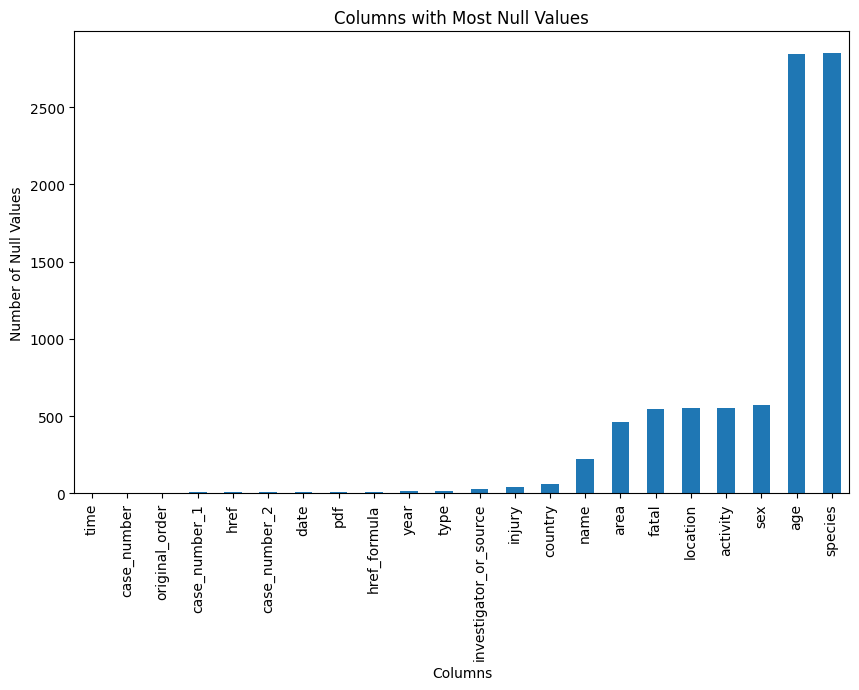

In [28]:
# Calculate the number of null values in each column
null_counts = sharks.isnull().sum()

# Sort the columns by the number of null values (ascending)
null_counts = null_counts.sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Columns with Most Null Values')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')


In [29]:
sharks.species.head(15)

0               White shark
1                       NaN
2                       NaN
3                 2 m shark
4           Tiger shark, 3m
5                       NaN
6               Tiger shark
7           Lemon shark, 3'
8            Bull shark, 6'
9                       NaN
10          Grey reef shark
11                      NaN
12                      NaN
13         Invalid incident
14    Tawny nurse shark, 2m
Name: species, dtype: object

#### Truly bad column without any sort of norm, we will fill nulls with unknown for now and send an email to the Data Engineer

In [30]:
sharks.species.fillna('unknown', inplace=True)
sharks["species"].isnull().value_counts()

species
False    6312
Name: count, dtype: int64

In [31]:
sharks.isnull().sum().sort_values(ascending=False)

age                       2841
sex                        575
activity                   554
location                   550
fatal                      549
area                       465
name                       220
country                     60
injury                      38
investigator_or_source      27
type                        14
year                        12
href_formula                11
href                        10
date                        10
case_number_2               10
case_number_1               10
pdf                         10
original_order               3
case_number                  2
species                      0
time                         0
dtype: int64

### We have several null columns left, where we are left without much clue on how to fill the missing values, so let's fill them with unknowns

In [32]:
sharks.fillna('unknown', inplace=True)

/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_23570/2168755920.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sharks.fillna('unknown', inplace=True)


In [33]:
sharks.isnull().sum().any()

False

In [34]:
sharks.shape

(6312, 22)

#### No more null values in our Dataframe. We had to fill several `NaN` values with `unknown` but we are on our way to cleaning all the dataset. Now we can start with Incorrect values.

## Step 5: Normalizing and Standardizing Values ✅

#### Let's take a look into the columns from left to right, keeping in mind we still can remove `3812` rows

In [35]:
sharks.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,evening,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,afternoon,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,morning,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


### Normalizing `year` column

In [36]:
sharks.year

0         2018.0
1         2018.0
2         2018.0
3         2018.0
4         2018.0
          ...   
6307     unknown
6308     unknown
6309     unknown
8702     unknown
25722    unknown
Name: year, Length: 6312, dtype: object

#### Let's remove rows that have more than 5 `unknown` values

In [37]:
count_unknown = (sharks == 'unknown').sum(axis=1)

# Filter rows with no more than 5 'unknown' values
sharks = sharks[count_unknown <= 5]

sharks.shape

(6167, 22)

`145` rows dropped, rows with 5 or more unkowns are not worth and not that many to affect our analysis

In [38]:
sharks.year.unique()

array([2018.0, 2017.0, 'unknown', 2016.0, 2015.0, 2014.0, 2013.0, 2012.0,
       2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0,
       2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0,
       1995.0, 1984.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0,
       1969.0, 1988.0, 1987.0, 1986.0, 1985.0, 1983.0, 1982.0, 1981.0,
       1980.0, 1979.0, 1978.0, 1977.0, 1976.0, 1975.0, 1974.0, 1973.0,
       1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1965.0, 1964.0,
       1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0,
       1955.0, 1954.0, 1953.0, 1952.0, 1951.0, 1950.0, 1949.0, 1948.0,
       1848.0, 1947.0, 1946.0, 1945.0, 1944.0, 1943.0, 1942.0, 1941.0,
       1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0,
       1932.0, 1931.0, 1930.0, 1929.0, 1928.0, 1927.0, 1926.0, 1925.0,
       1924.0, 1923.0, 1922.0, 1921.0, 1920.0, 1919.0, 1918.0, 1917.0,
       1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1911.0, 1910.0, 1909.0,
   

In [39]:
for value in sharks['year']:
    if isinstance(value, str):
        print(value)

unknown
unknown


In [40]:
# Use boolean indexing to select rows that don't have 'unknown' in the 'Year' column
sharks = sharks[sharks['year'] != 'unknown']

In [41]:
sharks.year.astype(int)

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6297       0
6298       0
6299       0
6300       0
6301       0
Name: year, Length: 6165, dtype: int64

In [42]:
len(sharks[sharks['year'] < 1700])

128

#### We will remove the `128` rows with attacks in years earlier than `1700`

In [43]:
sharks = sharks[sharks['year'] > 1700]
sharks.shape

(6034, 22)

In [44]:
sharks['year'] = sharks['year'].astype(int)


In [45]:
sharks.year.info()

<class 'pandas.core.series.Series'>
Index: 6034 entries, 0 to 6160
Series name: year
Non-Null Count  Dtype
--------------  -----
6034 non-null   int64
dtypes: int64(1)
memory usage: 94.3 KB


### Normalizing `type` column

In [46]:
sharks.type.head()

0       Boating
1    Unprovoked
2       Invalid
3    Unprovoked
4      Provoked
Name: type, dtype: object

#### Let's check the number of `unknown` values in `Type column`

In [47]:
len(sharks[sharks['type']=='unknown'])

3

In [48]:
sharks = sharks[sharks['type'] != 'unknown']

In [49]:
sharks.type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'Boat', 'Boatomg'], dtype=object)

In [50]:
sharks['type'] = sharks['type'].str.replace('.*Boat.*', 'Boat', regex=True)
sharks.type.value_counts()

type
Unprovoked      4419
Provoked         564
Invalid          504
Boat             330
Sea Disaster     212
Questionable       2
Name: count, dtype: int64

Seeing there is only 2 `Questionable` let's just drop them

In [51]:
sharks = sharks[sharks.type != 'Questionable']
sharks.type.value_counts()

type
Unprovoked      4419
Provoked         564
Invalid          504
Boat             330
Sea Disaster     212
Name: count, dtype: int64

### Normalizing `country` column

In [52]:
sharks[sharks['country']=="unknown"].shape

(23, 22)

#### Let's proceed and remove the 23 rows with `unknown` countries

In [53]:
sharks = sharks[sharks['country']!="unknown"]

In [54]:
sharks.country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'CUBA', 'MAURITIUS', 'NEW ZEALAND',
       'SPAIN', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'COMOROS', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE',
       'Fiji', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA',
       'MOZAMBIQUE', 'FIJI', 'PUERTO RICO', 'ITALY', 'ATLANTIC OCEAN',
       'GREECE', 'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA',
       'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA',
       'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES', 'GUAM',
       'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA',
       'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'UNITED ARAB EMIRATE

In [55]:
sharks[sharks['country'].str.contains('\?')]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order
4345,1954.04.00,Apr-1954,1954,Provoked,SUDAN?,Red Sea,Southern part,Spearfishing,Jean Foucher-Createau,M,unknown,"Speared small shark, shark bit his thigh and/o...",N,unknown,unknown,"V.M. Coppleson (1962), p.254; H.D. Baldridge, ...",1954.04.00-Foucher-Creteau.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1954.04.00,1954.04.00,1958.0
5894,1872.11.30.R,Reported 30-Nov-1872,1872,Unprovoked,INDIAN OCEAN?,unknown,unknown,Swimming to avoid capture,Malay pirates,M,unknown,FATAL,Y,unknown,unknown,"The Mercury, 11/230/1872",1872.11.30.R-MalayPirates.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1872.11.30.R,1872.11.30.R,409.0


Let's remove the '?' from these 2 rows

In [56]:
sharks['country'] = sharks['country'].str.replace('?', '')

### Normalizing `activity` column

We will use regex to join values that share the same keywords and reduce a little bit the amount of activities `1453`

In [57]:
sharks.activity.value_counts().head(50)

activity
Surfing                           965
Swimming                          845
unknown                           441
Fishing                           421
Spearfishing                      330
Bathing                           155
Wading                            145
Diving                            106
Standing                           97
Snorkeling                         88
Scuba diving                       75
Body boarding                      61
Body surfing                       49
Swimming                           46
Kayaking                           33
Treading water                     32
Fell overboard                     30
Boogie boarding                    29
Free diving                        27
Pearl diving                       27
Windsurfing                        19
Walking                            17
Boogie Boarding                    16
Shark fishing                      15
Floating                           14
Fishing                            13
Sur

In [58]:
standardized_values = {
    "Surfing": "Surfing",
    "Swimming": "Swimming",
    "unknown": "Unknown",
    "Fishing": "Fishing",
    "Spearfishing": "Spearfishing",
    "Bathing": "Bathing",
    "Wading": "Wading",
    "Diving": "Diving",
    "Standing": "Standing",
    "Snorkeling": "Snorkeling",
    "Scuba diving": "Scuba Diving",
    "Body boarding": "Body Boarding",
    "Body surfing": "Body Surfing",
    "Swimming ": "Swimming", 
}


In [59]:
sharks['Normalized_Activity'] = sharks['activity'].apply(lambda x: process.extractOne(x, choices=standardized_values.keys())[0])

In [60]:
sharks.Normalized_Activity.value_counts()

Normalized_Activity
Surfing          1206
Swimming         1100
Fishing           873
Wading            469
unknown           457
Diving            452
Spearfishing      386
Bathing           331
Body boarding     222
Standing          176
Snorkeling        133
Scuba diving      125
Body surfing       76
Name: count, dtype: int64

In [61]:
sharks['activity'] = sharks['Normalized_Activity']
sharks.drop(columns=['Normalized_Activity'], inplace=True)

### Normalizing `name` column

In [62]:
sharks.name.value_counts()[sharks.name.value_counts() > 2]

name
male               506
unknown            134
female              94
boy                 20
2 males             14
boat                13
Anonymous           10
child               10
sailor              10
a sailor             8
Unidentified         6
girl                 6
males                6
a native             5
Unknown              4
fisherman            4
a soldier            4
black male           4
2 fishermen          4
Zulu male            3
Andre Hartman        3
Japanese diver       3
dinghy               3
John Williams        3
a pearl diver        3
 male                3
M.C.                 3
Arab boy             3
2 women              3
native boy           3
Russian male         3
aboriginal male      3
Name: count, dtype: int64

So many incorrect values, let's normalize this column and clean it!

In [63]:
name_counts = sharks['name'].value_counts()
repeated_names = name_counts[name_counts > 2].index

# Replace repeated names with 'unknown'
sharks['name'] = pd.Series(['unknown' if name in repeated_names else name for name in sharks['name']])

In [64]:
sharks.name.value_counts().sample(40)

name
Paul Ausum                                         1
Akira Tuchiya                                      1
Qalo Moceyawa                                      1
Theodore C. Swienty                                1
Gerardo Solis                                      1
Clifford Hoogvorst                                 1
Dr. D.H. Teas                                      1
Fanie Schreuder                                    1
Griffith Yamaguchi                                 1
David Drummond                                     1
Matthew May                                        1
boat, occupants, P. Groenwald and others           1
Boat: occupants: Matt Mitchell & 2 other people    1
Jamie  Harrington                                  1
Wallace John McCutcheon                            1
Fijian boy                                         1
Aaron Muilwyk                                      1
August Schulke & Karl Schafer                      1
Tod Wallersheim                          

In [65]:
sharks.fillna('unknown', inplace=True)

In [66]:
# Filter names with 'Name Surname' structure
sharks = sharks[sharks['name'].str.match(r'^[A-Z][a-z]*\s[A-Z][a-z]*$')]

In [67]:
sharks.shape

(2881, 22)

### Normalizing `sex` column

In [68]:
sharks.sex.value_counts()

sex
M          2337
F           325
unknown     216
M             1
lli           1
.             1
Name: count, dtype: int64

In [69]:
sharks.sex.str.strip()

0       F
2       M
8       M
12      M
13      M
       ..
5981    M
5989    M
5991    M
5995    M
6000    M
Name: sex, Length: 2881, dtype: object

In [70]:
# Lets map the values with a function
def map_sex(value):
    if value in ['M ', 'N', 'lli', 'M']:
        return 'M'
    elif value == 'F':
        return 'F'
    else:
        return 'unknown'

# Apply the mapping function to the 'sex' column
sharks['sex'] = sharks['sex'].apply(map_sex)

# Display the value counts
sharks['sex'].value_counts()



sex
M          2339
F           325
unknown     217
Name: count, dtype: int64

### Normalizing `age` column

In [71]:
sharks.age.value_counts()

age
unknown      1030
17             83
20             81
19             74
18             72
             ... 
75              1
18 months       1
23 & 20         1
 30             1
10 or 12        1
Name: count, Length: 119, dtype: int64

In [72]:
sharks.age = sharks.age.str.strip()  # Remove leading/trailing spaces
sharks.age = sharks.age.str.replace(r'\s+', '', regex=True)  # Remove random spaces

sharks.age.value_counts()

age
unknown    1030
17           83
20           82
19           74
18           72
           ... 
30or36        1
75            1
33or37        1
23&20         1
10or12        1
Name: count, Length: 116, dtype: int64

This code uses a regular expression `(\d+)` to find the numeric part of the age, and it checks if the extracted value is between 0 and 90. If the age contains non-numeric characters or is outside the valid range, it sets the age to `'unknown'`


In [73]:
def extract_age(age_str):
    match = re.search(r'\d+', age_str)
    if match:
        age = int(match.group())
        if 0 <= age <= 90:
            return age
    return 'unknown'

# Apply the extraction function to the 'age' column
sharks['age'] = sharks['age'].apply(extract_age)


In [74]:
sharks.age.value_counts()

age
unknown    1046
20           85
17           83
18           75
19           75
           ... 
86            1
3             1
74            1
72            1
2             1
Name: count, Length: 77, dtype: int64

### Normalizing the `species` column

In [75]:
sharks.species.value_counts()

species
unknown                                               1158
White shark                                             84
Shark involvement prior to death was not confirmed      47
Shark involvement not confirmed                         37
Tiger shark                                             36
                                                      ... 
Bronze whaler shark, 1.5 m [5']                          1
2 m [6.75'] sevengill  shark                             1
60 cm [23.6"] blind or brown shark                       1
Possibily a  1.5 to 2 m sandtiger shark                  1
68" shark                                                1
Name: count, Length: 911, dtype: int64

In [76]:
# Lets make a list with the most common species
shark_species = {
    'bull',
    'tiger',
    'lemon',
    'great hammerhead',
    'nurse',
    'blacktip',
    'sandbar',
    'thresher',
    'blue',
    'mako',
    'hammerhead',
    'goblin',
    'zambesi',
    'angel',
    'leopard',
    'spinner',
    'silky',
    'white',
    'galapagos',
    'reef',
    'porbeagle',
    'whitetip',
    'tawny',
    'basking',
    'cow',
    'dusky',
    'wobbegong',
    'megamouth',
    'cookiecutter',
    'spurdog',
    'lemonsole',
    'smoothhound',
    'swellshark',
    'banded cat',
    'gulper',
    'sleeper',
    'dogfish',
    'bramble',
    'velvet belly lantern',
    'caribbean reef'
}

In [77]:
def fill_species(x):
    x = x.lower()
    matched_species = [i for i in shark_species if fuzz.partial_ratio(i.lower(), x) > 80]
    return matched_species[0].capitalize() if matched_species else 'Other'

# Apply the fill_species function to the 'species' column
sharks['species'] = sharks['species'].apply(fill_species)


In [78]:
sharks.species.value_counts()

species
Other                   1946
White                    344
Tiger                    146
Bull                      99
Blacktip                  56
Blue                      39
Nurse                     39
Hammerhead                30
Mako                      29
Lemon                     26
Wobbegong                 24
Zambesi                   21
Reef                      18
Spinner                   12
Dusky                      8
Caribbean reef             8
Sandbar                    5
Basking                    4
Thresher                   4
Porbeagle                  4
Angel                      4
Galapagos                  3
Velvet belly lantern       3
Silky                      2
Dogfish                    2
Smoothhound                1
Goblin                     1
Cow                        1
Leopard                    1
Whitetip                   1
Name: count, dtype: int64

### Normalizing the `date` column

In [79]:
sharks.date.head(20)

0     25-Jun-2018
2     09-Jun-2018
8     26-May-2018
12    13-May-2018
13    13-May-2018
14       May 2018
18    28-Apr-2018
19    28-Apr-2018
21    25-Apr-2018
24    22-Apr-2018
26    15-Apr-2018
27    15-Apr-2018
28    15-Apr-2018
29    15-Apr-2018
32    09-Apr-2018
35    31-Mar-2018
36    14-Mar-2018
37     9-Mar-2018
39    24-Feb-2018
40    23-Feb-2018
Name: date, dtype: object

In [80]:
sharks['date'] = sharks['date'].str.replace('Reported ', '')

In [81]:
# Extract day, month, and year using regular expressions
sharks[['day', 'month', 'year2']] = sharks['date'].str.extract(r'(\d+)?-(\w+)?-(\d+)?')

# Fill 'unknown' for missing values
sharks['day'].fillna('unknown', inplace=True)
sharks['month'].fillna('unknown', inplace=True)
sharks['year'].fillna('unknown', inplace=True)

# Resulting DataFrame
sharks.head()


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,day,month,year2
0,2018.06.25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Wading,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,evening,White,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,25,Jun,2018
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,morning,Other,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,09,Jun,2018
8,2018.05.26.b,26-May-2018,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Wading,Cody High,M,15,Lower left leg bitten,N,afternoon,Bull,"K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,26,May,2018
12,2018.05.13.b,13-May-2018,2018,Unprovoked,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Jei Turrell,M,10,Severe bite to right forearm,N,afternoon,Other,"C. Creswell, GSAF & K. McMurray TrackingSharks...",2018.05.13.b-Turrell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.b,2018.05.13.b,6291.0,13,May,2018
13,2018.05.13.a,13-May-2018,2018,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,Injured by teeth of a dead porbeagle shark he ...,N,morning,Other,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.a,2018.05.13.a,6290.0,13,May,2018


In [82]:
filtered_df = sharks[(sharks['year'] == 'unknown') & (sharks['year2'] != 'unknown')]
filtered_df

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,day,month,year2


Let's drop the year2 & date column and rearrange order of columns

In [83]:
sharks.drop(columns=['year2', 'date'], inplace=True)

In [84]:
sharks.columns

Index(['case_number', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'day', 'month'],
      dtype='object')

In [85]:
new_order = ['day', 'month', 'year', 'time', 'country', 'area', 'location',
       'name', 'sex', 'age', 'type',
       'activity', 'injury', 'fatal', 'species',
       'original_order', 'investigator_or_source', 'pdf', 'href_formula',
       'href', 'case_number']

In [86]:
sharks = sharks[new_order]

### Normalizing the `fatal` column

In [87]:
sharks.fatal.value_counts()

fatal
N          2125
Y           520
unknown     213
UNKNOWN      21
M             1
2017          1
Name: count, dtype: int64

In [88]:
sharks[sharks['fatal'] == 'M']

,day,month,year,time,country,area,location,name,sex,age,type,activity,injury,fatal,species,original_order,investigator_or_source,pdf,href_formula,href,case_number
285,18,Apr,2016,morning,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Maximo Trinidad,M,22,Provoked,Spearfishing,Laceration to knee by speared shark PROVOKED I...,M,Reef,6018.0,"TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b


In [89]:
# Step 1: Remove all spaces and convert all values to uppercase
sharks['fatal'] = sharks['fatal'].str.replace(" ", "").str.upper()
# Step 2: Replace 'M' with 'N'
sharks['fatal'].replace({'M': 'N'}, inplace=True)
# Step 3: Remove the row with '2017'
sharks = sharks[sharks['fatal'] != '2017']


sharks.fatal.value_counts()

fatal
N          2126
Y           520
UNKNOWN     234
Name: count, dtype: int64

## Step 6: Export clean dataset 💾

In [90]:
original_shape

(25723, 24)

In [91]:
sharks.shape

(2880, 21)

In [92]:
sharks.duplicated().any()

False

In [93]:
sharks.head()

,day,month,year,time,country,area,location,name,sex,age,type,activity,injury,fatal,species,original_order,investigator_or_source,pdf,href_formula,href,case_number
0,25,Jun,2018,evening,USA,California,"Oceanside, San Diego County",Julie Wolfe,F,57,Boat,Wading,"No injury to occupant, outrigger canoe and pad...",N,White,6303.0,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25
2,09,Jun,2018,morning,USA,Hawaii,"Habush, Oahu",John Denges,M,48,Invalid,Surfing,Injury to left lower leg from surfboard skeg,N,Other,6301.0,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09
8,26,May,2018,afternoon,USA,Florida,"Cocoa Beach, Brevard County",Cody High,M,15,Unprovoked,Wading,Lower left leg bitten,N,Bull,6295.0,"K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b
12,13,May,2018,afternoon,USA,South Carolina,"Hilton Head Island, Beaufort County",Jei Turrell,M,10,Unprovoked,Swimming,Severe bite to right forearm,N,Other,6291.0,"C. Creswell, GSAF & K. McMurray TrackingSharks...",2018.05.13.b-Turrell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.b
13,13,May,2018,morning,ENGLAND,Cornwall,Off Land's End,Max Berryman,M,21,Invalid,Fishing,Injured by teeth of a dead porbeagle shark he ...,N,Other,6290.0,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.a


In [94]:
sharks.reset_index(inplace=True)
sharks.to_csv('../data/shark_attacks_clean.csv', index=False)